In [8]:
from __future__ import print_function
import langid
import logging
import nltk
import numpy as np
import re
import sys
import time
from collections import defaultdict
from gensim import corpora
from optparse import OptionParser
from pymongo import MongoClient
from string import digits

from gensim import corpora, models, similarities
import pyLDAvis.gensim
import sys
from twitter_preprocessing_2 import preprocess
import warnings

from pymongo import MongoClient
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt
import numpy as np
import operator

from LSA import LSA
warnings.simplefilter("ignore")



In [13]:
corpus, dictionary = preprocess('Israel')
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=4, passes=10)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

query is :Israel
this_many_docs 75


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      27.854943        1       1 -0.007897  0.058349
0      24.801250        1       2 -0.031385  0.092639
1      23.929472        1       3 -0.103938 -0.101120
3      23.414334        1       4  0.143220 -0.049867, topic_info=     Category        Freq             Term       Total  loglift  logprob
term                                                                    
264   Default   40.000000         clerical   40.000000  30.0000  30.0000
3830  Default   45.000000        palestine   45.000000  29.0000  29.0000
4008  Default   41.000000           hiring   41.000000  28.0000  28.0000
2297  Default   49.000000            saudi   49.000000  27.0000  27.0000
4517  Default   34.000000   mustlovemoving   34.000000  26.0000  26.0000
649   Default   54.000000             iran   54.000000  25.0000  25.0000
3098  Default   39.000000            yemen   39.000000  24.0000  24.0000
2866  Default   35.000000   kellyannepolls   35.000000  23.0000  23.0000
1592  Default   32.000000       ternimarco   32.000000  22.0000  22.0000
901   Default   32.000000    dreadgodshand   32.000000  21.0000  21.0000
2986  Default   39.000000              dup   39.000000  20.0000  20.0000
1195  Default   32.000000         iolsport   32.000000  19.0000  19.0000
2665  Default   92.000000            syria   92.000000  18.0000  18.0000
3474  Default   34.000000              bds   34.000000  17.0000  17.0000
4074  Default   48.000000              job   48.000000  16.0000  16.0000
4138  Default   57.000000             gaza   57.000000  15.0000  15.0000
908   Default   40.000000           donald   40.000000  14.0000  14.0000
1052  Default  207.000000           israel  207.000000  13.0000  13.0000
4139  Default   20.000000             poet   20.000000  12.0000  12.0000
3620  Default   24.000000    leehsienloong   24.000000  11.0000  11.0000
3916  Default   20.000000             doug   20.000000  10.0000  10.0000
3604  Default   20.000000         nothiefs   20.000000   9.0000   9.0000
4477  Default   49.000000          supreme   49.000000   8.0000   8.0000
3456  Default   21.000000            haiku   21.000000   7.0000   7.0000
2466  Default   57.000000            court   57.000000   6.0000   6.0000
4335  Default   19.000000        careerarc   19.000000   5.0000   5.0000
3733  Default   22.000000              emm   22.000000   4.0000   4.0000
1453  Default   19.000000       dreamdearg   19.000000   3.0000   3.0000
1322  Default   19.000000             cnag   19.000000   2.0000   2.0000
680   Default   19.000000   chrishazzardsf   19.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
1972   Topic4   14.242479     dykemarchchi   15.934761   1.3395  -6.0519
4074   Topic4   39.570801              job   48.771169   1.2428  -5.0300
2539   Topic4   21.054137             pray   26.013912   1.2403  -5.6610
4069   Topic4   12.840119          opening   15.131737   1.2876  -6.1556
1107   Topic4   21.852768            daily   27.802590   1.2110  -5.6238
310    Topic4    9.418561              fit   10.911345   1.3047  -6.4654
175    Topic4    9.410829        recommend   10.911386   1.3039  -6.4663
4477   Topic4   32.362145          supreme   49.975667   1.0173  -5.2311
2466   Topic4   33.001207            court   57.773435   0.8918  -5.2116
2580   Topic4   13.571148            bless   17.694104   1.1865  -6.1002
523    Topic4   13.545990             blue   17.744681   1.1818  -6.1020
3791   Topic4   17.006630           latest   24.517661   1.0860  -5.8745
3642   Topic4   21.611358            peace   35.328427   0.9604  -5.6349
1326   Topic4   74.394266            trump  254.750262   0.2209  -4.3987
1165   Topic4   29.468872              cnn   61.908494   0.7095  -5.3248
1393   Topic4   19.103531           travel   32.206433   0.9295  -5.7583
2834   Topic4   15.621352          justice   22.845343  

 --------------------- 
   Silhouette Coefficient: 0.579
 --------------------- 
T0)
 0.307*israel
 0.258*trump
 0.126*people
 0.124*israeli
 0.112*obama
 0.100*palestinian
()
T1)
 0.513*israel
 0.265*israeli
 0.240*palestinian
 0.219*gaza
 0.187*trump
 0.169*bds
()
T2)
 0.337*israel
 0.333*palestinian
 0.287*israeli
 0.212*gaza
 0.191*palestine
 0.190*times
()


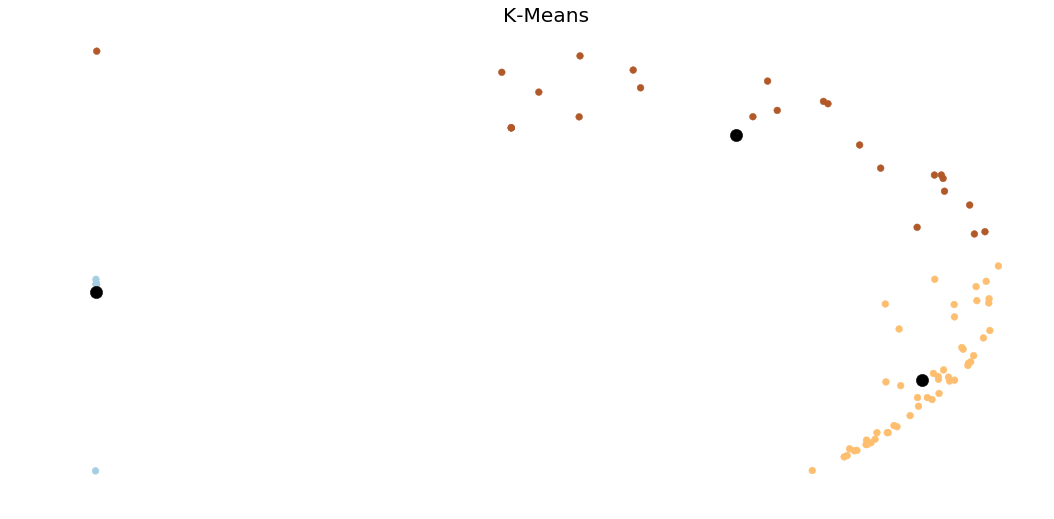

In [6]:
LSA()

In [12]:
corpus, dictionary = preprocess('Elon Musk')
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=10)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

query is :Elon Musk
this_many_docs 75


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      24.767022        1       1  0.314734 -0.073250
7      15.732601        1       2  0.058233  0.038503
9      14.726413        1       3 -0.015261  0.059688
4       9.637558        1       4 -0.029232  0.077166
2       9.097858        1       5 -0.101530  0.109115
1       6.879478        1       6  0.115656 -0.021758
6       6.042980        1       7 -0.071598  0.054541
8       5.887255        1       8 -0.001800  0.064410
0       3.688966        1       9 -0.135350 -0.208678
3       3.539869        1      10 -0.133850 -0.099739, topic_info=     Category        Freq             Term       Total  loglift  logprob
term                                                                    
752   Default  616.000000     entrepreneur  616.000000  30.0000  30.0000
2918  Default   56.000000        submitted   56.000000  29.0000  29.0000
167   Default   52.000000           travel   52.000000  28.0000  28.0000
1655  Default   68.000000            sales   68.000000  27.0000  27.0000
465   Default   23.000000  travelnpleasure   23.000000  26.0000  26.0000
156   Default   24.000000      bertrandc1m   24.000000  25.0000  25.0000
1537  Default   86.000000            world   86.000000  24.0000  24.0000
1697  Default   59.000000          biztips   59.000000  23.0000  23.0000
2495  Default   26.000000         lasvegas   26.000000  22.0000  22.0000
1982  Default   19.000000        ceo1month   19.000000  21.0000  21.0000
2503  Default   26.000000             link   26.000000  20.0000  20.0000
2650  Default  208.000000         business  208.000000  19.0000  19.0000
972   Default   29.000000            verge   29.000000  18.0000  18.0000
2177  Default   23.000000           femail   23.000000  17.0000  17.0000
524   Default   40.000000             news   40.000000  16.0000  16.0000
1749  Default   86.000000            small   86.000000  15.0000  15.0000
2207  Default   79.000000          startup   79.000000  14.0000  14.0000
2636  Default   31.000000            video   31.000000  13.0000  13.0000
2968  Default   19.000000             fact   19.000000  12.0000  12.0000
1889  Default   18.000000  businessinsider   18.000000  11.0000  11.0000
789   Default   13.000000             isis   13.000000  10.0000  10.0000
424   Default   47.000000             tech   47.000000   9.0000   9.0000
1568  Default   24.000000          bigdata   24.000000   8.0000   8.0000
2558  Default   46.000000       youngmoney   46.000000   7.0000   7.0000
1056  Default   38.000000       jeffbullas   38.000000   6.0000   6.0000
2212  Default   30.000000              seo   30.000000   5.0000   5.0000
74    Default   69.000000             tips   69.000000   4.0000   4.0000
694   Default   89.000000           people   89.000000   3.0000   3.0000
2590  Default   79.000000      infographic   79.000000   2.0000   2.0000
2456  Default   13.000000      pulsedaniel   13.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
2566  Topic10    1.456186        onthisday    2.224924   2.9172  -6.2879
2466  Topic10    1.455843       dkhniunrfp    2.224809   2.9170  -6.2882
1789  Topic10    1.455901             owns    2.224981   2.9170  -6.2881
249   Topic10    1.455917           silver    2.225106   2.9169  -6.2881
2349  Topic10    1.455741      vfpnational    2.224854   2.9169  -6.2882
1489  Topic10    1.455747          charges    2.224939   2.9169  -6.2882
2587  Topic10    2.839344            alien    4.405086   2.9019  -5.6202
2870  Topic10    2.839036            scary    4.475001   2.8860  -5.6203
2736  Topic10    2.840928        skydiving    4.512162   2.8784  -5.6196
2167  Topic10    2.841240          flights    4.512729   2.8784  -5.6195
2808  Topic10    2.837344          bridges    4.529348   2.8734  -5.6209
167   Topic10   20.840517           travel   52.782067   2.4118  -3.6268
438   Topic10    5.60101

In [11]:
corpus, dictionary = preprocess('stain remover')
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=4, passes=10)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

query is :stain remover
this_many_docs 75


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      32.170007        1       1  0.261324 -0.043290
0      27.674446        1       2 -0.067184  0.042993
3      24.874034        1       3 -0.144785 -0.148968
1      15.281513        1       4 -0.049356  0.149265, topic_info=     Category        Freq             Term       Total  loglift  logprob
term                                                                    
3126  Default  375.000000              win  375.000000  30.0000  30.0000
3444  Default  496.000000              buy  496.000000  29.0000  29.0000
2109  Default  279.000000         giveaway  279.000000  28.0000  28.0000
236   Default  166.000000            enter  166.000000  27.0000  27.0000
418   Default  160.000000          fashion  160.000000  26.0000  26.0000
1646  Default  101.000000         shopping  101.000000  25.0000  25.0000
1168  Default   89.000000          lakisha   89.000000  24.0000  24.0000
2895  Default   96.000000         services   96.000000  23.0000  23.0000
42    Default   72.000000            prize   72.000000  22.0000  22.0000
1928  Default   81.000000     gadgets_haul   81.000000  21.0000  21.0000
625   Default   64.000000          entered   64.000000  20.0000  20.0000
2986  Default   78.000000       priceabate   78.000000  19.0000  19.0000
2915  Default  138.000000         cleaning  138.000000  18.0000  18.0000
756   Default  104.000000           online  104.000000  17.0000  17.0000
2312  Default  101.000000            deals  101.000000  16.0000  16.0000
1597  Default   93.000000          coupons   93.000000  15.0000  15.0000
2833  Default   77.000000          jewelry   77.000000  14.0000  14.0000
2632  Default   71.000000   nustylefashion   71.000000  13.0000  13.0000
404   Default   99.000000             ebay   99.000000  12.0000  12.0000
3438  Default   66.000000     nicerjewelry   66.000000  11.0000  11.0000
3598  Default   62.000000             ends   62.000000  10.0000  10.0000
772   Default   87.000000             gift   87.000000   9.0000   9.0000
1341  Default   87.000000             card   87.000000   8.0000   8.0000
3033  Default  113.000000           garden  113.000000   7.0000   7.0000
2248  Default   91.000000            style   91.000000   6.0000   6.0000
1738  Default  111.000000           summer  111.000000   5.0000   5.0000
520   Default  146.000000           amazon  146.000000   4.0000   4.0000
2455  Default   99.000000            check   99.000000   3.0000   3.0000
1295  Default   51.000000  health_anbeauty   51.000000   2.0000   2.0000
117   Default  118.000000             pack  118.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
4004   Topic4    7.432260              ave    8.137827   1.7878  -6.3668
30     Topic4    7.431335          blanket    8.137973   1.7877  -6.3669
2013   Topic4    7.426861             tail    8.138406   1.7870  -6.3675
2695   Topic4    6.628878             loop    7.330101   1.7780  -6.4812
899    Topic4    8.772573            solar    9.782973   1.7695  -6.2010
3516   Topic4   17.128964           trying   19.584176   1.7446  -5.5318
309    Topic4   17.133614         trending   19.619749   1.7430  -5.5316
2855   Topic4   12.249037             stem   13.882126   1.7534  -5.8672
61     Topic4   25.924787             chef   31.183993   1.6938  -5.1174
1208   Topic4   21.941611          product   26.208313   1.7008  -5.2842
2092   Topic4   18.726211            hours   22.080284   1.7138  -5.4427
2053   Topic4   13.483555         portable   15.539275   1.7366  -5.7711
2878   Topic4   23.535258       cars3event   30.572894   1.6169  -5.2141
135    Topic4   30.234324           carpet   45.835683   1.4624  -4.9636
397    Topic4   12.242747       upholstery   14.764137   1.6913  -5.8677
372    Topic4   24.328604           master   35.731945   1.4941  -5.1810
1215   Topic4   24.839917             spot   37.590894  

In [10]:
corpus, dictionary = preprocess('Coachella')
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=10)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

query is :Coachella
this_many_docs 75


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      22.914137        1       1  0.148253 -0.033371
0      18.620382        1       2 -0.275810 -0.059498
3      13.021312        1       3 -0.130807 -0.184794
1      11.473701        1       4  0.135248 -0.011278
8       9.524582        1       5 -0.106633  0.267690
6       5.928513        1       6  0.096105 -0.051312
2       5.926123        1       7  0.100401  0.020905
4       5.005419        1       8  0.115371  0.028480
5       4.675755        1       9 -0.181199  0.029668
9       2.910076        1      10  0.099071 -0.006490, topic_info=     Category        Freq             Term       Total  loglift  logprob
term                                                                    
2256  Default  323.000000  atheistengineer  323.000000  30.0000  30.0000
1038  Default  350.000000   coachella_mink  350.000000  29.0000  29.0000
2329  Default  225.000000        the1voyce  225.000000  28.0000  28.0000
1474  Default  132.000000   interiordesign  132.000000  27.0000  27.0000
306   Default  120.000000             john  120.000000  26.0000  26.0000
2151  Default  304.000000    mithicalraven  304.000000  25.0000  25.0000
420   Default  115.000000     architecture  115.000000  24.0000  24.0000
1676  Default  192.000000       chesspiano  192.000000  23.0000  23.0000
982   Default  221.000000       rpgpowaaaa  221.000000  22.0000  22.0000
1949  Default  119.000000           please  119.000000  21.0000  21.0000
718   Default  182.000000     danielbsmith  182.000000  20.0000  20.0000
2043  Default   78.000000       decoration   78.000000  19.0000  19.0000
2909  Default   70.000000             home   70.000000  18.0000  18.0000
975   Default   91.000000          beyoncé   91.000000  17.0000  17.0000
824   Default   76.000000              jay   76.000000  16.0000  16.0000
2772  Default   36.000000  matbiangshadapz   36.000000  15.0000  15.0000
1941  Default   35.000000          firefan   35.000000  14.0000  14.0000
1557  Default   52.000000           design   52.000000  13.0000  13.0000
859   Default   35.000000         ladygaga   35.000000  12.0000  12.0000
1608  Default   47.000000       soundcloud   47.000000  11.0000  11.0000
2372  Default   34.000000      rudymancuso   34.000000  10.0000  10.0000
833   Default   97.000000             love   97.000000   9.0000   9.0000
208   Default   31.000000      tklforgiven   31.000000   8.0000   8.0000
785   Default   31.000000   thevoiceofcalm   31.000000   7.0000   7.0000
830   Default   49.000000       quendonian   49.000000   6.0000   6.0000
1867  Default   31.000000       architects   31.000000   5.0000   5.0000
2337  Default   43.000000     zeus_es_dios   43.000000   4.0000   4.0000
2301  Default   53.000000            video   53.000000   3.0000   3.0000
191   Default   27.000000             deco   27.000000   2.0000   2.0000
739   Default   42.000000            album   42.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
2666  Topic10    1.394778         ashbenzo    2.167687   3.0961  -6.0617
2295  Topic10    1.394368   danicalbarnett    2.167477   3.0959  -6.0620
2373  Topic10    1.394361            enews    2.167650   3.0958  -6.0620
2276  Topic10    1.394278            rhyme    2.167582   3.0958  -6.0620
1771  Topic10    1.394157              asu    2.167568   3.0957  -6.0621
61    Topic10    1.394118        thebrozgq    2.167541   3.0957  -6.0621
2304  Topic10    1.394002              odd    2.167571   3.0956  -6.0622
2176  Topic10    1.393921         nonsense    2.167671   3.0955  -6.0623
1295  Topic10    1.393765     fl0urescentt    2.167593   3.0954  -6.0624
809   Topic10    1.393739           french    2.167584   3.0954  -6.0624
2682  Topic10    4.716082      plltvseries    8.110526   2.9948  -4.8434
467   Topic10    2.059303        shaymitch    3.797862   2.9249  -5.6720
2609  Topic10    2.72063

In [9]:
corpus, dictionary = preprocess('GoPro')
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=10)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

query is :GoPro
this_many_docs 65


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      17.289941        1       1  0.084142 -0.059355
2      15.288397        1       2 -0.348353 -0.070509
0      15.009563        1       3  0.070087 -0.252452
6      11.768033        1       4  0.068458 -0.073698
1       9.441112        1       5 -0.104398  0.131352
5       7.593472        1       6  0.059632  0.096383
7       6.350830        1       7  0.015527  0.022529
8       6.044165        1       8  0.059350  0.082418
9       5.797924        1       9  0.048811  0.063054
4       5.416563        1      10  0.046744  0.060278, topic_info=     Category        Freq                Term       Total  loglift  logprob
term                                                                       
545   Default  281.000000               scuba  281.000000  30.0000  30.0000
911   Default  201.000000              hawaii  201.000000  29.0000  29.0000
1580  Default  146.000000              diving  146.000000  28.0000  28.0000
3195  Default  159.000000               drone  159.000000  27.0000  27.0000
2068  Default   99.000000              pinned   99.000000  26.0000  26.0000
965   Default  117.000000        rainbowscuba  117.000000  25.0000  25.0000
2927  Default  115.000000             youtube  115.000000  24.0000  24.0000
343   Default   74.000000              drones   74.000000  23.0000  23.0000
2693  Default  125.000000                 win  125.000000  22.0000  22.0000
531   Default   63.000000                news   63.000000  21.0000  21.0000
1711  Default   41.000000              stocks   41.000000  20.0000  20.0000
2715  Default  153.000000              camera  153.000000  19.0000  19.0000
2382  Default   39.000000    peopleareawesome   39.000000  18.0000  18.0000
2399  Default   38.000000           australia   38.000000  17.0000  17.0000
2217  Default   38.000000             firefan   38.000000  16.0000  16.0000
1077  Default   36.000000         backpacking   36.000000  15.0000  15.0000
163   Default   55.000000                 uav   55.000000  14.0000  14.0000
2770  Default   82.000000               watch   82.000000  13.0000  13.0000
372   Default   55.000000            honolulu   55.000000  12.0000  12.0000
1560  Default   49.000000          quadcopter   49.000000  11.0000  11.0000
642   Default   54.000000  rainbowscubahawaii   54.000000  10.0000  10.0000
1133  Default   51.000000           coralreef   51.000000   9.0000   9.0000
2538  Default   54.000000             rainbow   54.000000   8.0000   8.0000
28    Default   51.000000              plants   51.000000   7.0000   7.0000
190   Default   50.000000              oceans   50.000000   6.0000   6.0000
2108  Default  136.000000               video  136.000000   5.0000   5.0000
3207  Default   48.000000               liked   48.000000   4.0000   4.0000
400   Default   47.000000                seed   47.000000   3.0000   3.0000
1427  Default   47.000000                 pod   47.000000   2.0000   2.0000
1110  Default   41.000000                 dji   41.000000   1.0000   1.0000
...       ...         ...                 ...         ...      ...      ...
2667  Topic10    5.418103      jamesbeattieuk    6.220383   2.7776  -5.3332
3297  Topic10    5.417592         themeparkww    6.220526   2.7775  -5.3333
3210  Topic10   10.758579           blackpool   12.387017   2.7748  -4.6472
1530  Topic10    5.380071               jimin    6.222870   2.7702  -5.3403
1379  Topic10    5.375791              yoongi    6.223242   2.7693  -5.3410
2150  Topic10    4.676551         jmattmiller    5.450041   2.7626  -5.4804
2963  Topic10    4.658637              volume    5.450775   2.7587  -5.4842
744   Topic10    4.655780             clubpbe    5.451380   2.7579  -5.4848
3084  Topic10    4.654201      visitblackpool    5.451805   2.7575  -5.4852
928   Topic10    9.244080              shares   10.872266   2.7535  -4.7990
1442  Topic10    4.626685            jung

In [14]:
corpus, dictionary = preprocess('forrest gump')
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=10)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

query is :forrest gump
this_many_docs 75


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      19.011331        1       1  0.185702  0.008211
0      16.172801        1       2 -0.028442  0.009556
4      15.309983        1       3 -0.026154 -0.080881
7      10.804698        1       4 -0.121739  0.130085
5       9.171897        1       5 -0.032306 -0.099243
9       8.634975        1       6 -0.042333 -0.054714
2       7.284016        1       7 -0.005600 -0.035295
6       5.847103        1       8 -0.002830 -0.018783
3       4.968859        1       9  0.014121  0.037607
8       2.794338        1      10  0.059579  0.103456, topic_info=     Category        Freq             Term       Total  loglift  logprob
term                                                                    
518   Default   28.000000           sbstdf   28.000000  30.0000  30.0000
1159  Default   34.000000       noweaklynx   34.000000  29.0000  29.0000
331   Default   17.000000  famllyguyscenes   17.000000  28.0000  28.0000
2157  Default   19.000000        stfuslutx   19.000000  27.0000  27.0000
1492  Default    9.000000           taurus    9.000000  26.0000  26.0000
917   Default   48.000000        beamiller   48.000000  25.0000  25.0000
1632  Default   29.000000           follow   29.000000  24.0000  24.0000
762   Default    9.000000        emotional    9.000000  23.0000  23.0000
3006  Default   10.000000         grandeur   10.000000  22.0000  22.0000
2649  Default   20.000000            ships   20.000000  21.0000  21.0000
2614  Default    8.000000           waters    8.000000  20.0000  20.0000
966   Default   54.000000            trump   54.000000  19.0000  19.0000
2986  Default   19.000000            sʜɪᴘs   19.000000  18.0000  18.0000
2708  Default    7.000000     interactions    7.000000  17.0000  17.0000
2951  Default    7.000000            muddy    7.000000  16.0000  16.0000
2672  Default    7.000000         profound    7.000000  15.0000  15.0000
389   Default   14.000000             camp   14.000000  14.0000  14.0000
1462  Default   30.000000  realdonaldtrump   30.000000  13.0000  13.0000
2122  Default   10.000000            genre   10.000000  12.0000  12.0000
1812  Default    8.000000  jacobwhitesides    8.000000  11.0000  11.0000
3054  Default   15.000000   thatguyashtonn   15.000000  10.0000  10.0000
2310  Default    8.000000  braggafreestyle    8.000000   9.0000   9.0000
247   Default   17.000000       crossovers   17.000000   8.0000   8.0000
997   Default   22.000000         birthday   22.000000   7.0000   7.0000
918   Default  109.000000             love  109.000000   6.0000   6.0000
2577  Default   13.000000   laurenjauregui   13.000000   5.0000   5.0000
2848  Default   26.000000              jay   26.000000   4.0000   4.0000
841   Default    8.000000     __sugarbaby_    8.000000   3.0000   3.0000
31    Default   30.000000            every   30.000000   2.0000   2.0000
665   Default   20.000000           donald   20.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
2351  Topic10    1.227126           france    1.971469   3.1035  -5.9254
1572  Topic10    1.227063         mwkeenan    1.971492   3.1034  -5.9255
1620  Topic10    1.226803      cfsmtbation    1.971575   3.1032  -5.9257
2169  Topic10    1.226649           pedals    1.971627   3.1030  -5.9258
2575  Topic10    1.226478              tdf    1.971678   3.1028  -5.9259
2890  Topic10    1.222645              hei    1.973608   3.0987  -5.9291
1296  Topic10    1.223077             mona    2.755166   2.7655  -5.9287
816   Topic10    1.227085            dance    2.789777   2.7563  -5.9254
3146  Topic10    1.227271            guard    2.860469   2.7314  -5.9253
1225  Topic10    1.805594             slow    4.231102   2.7260  -5.5392
2713  Topic10    1.226524           surely    2.878823   2.7244  -5.9259
909   Topic10    1.812734              box    4.334693   2.7058  -5.5352
1393  Topic10    1.22716

In [15]:
corpus, dictionary = preprocess('Brookline')
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=10)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

query is :Brookline
this_many_docs 75


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      32.997768        1       1  0.044806 -0.195538
1      16.592445        1       2 -0.390862 -0.106081
7      11.625607        1       3  0.074344 -0.066969
2       9.257987        1       4 -0.044322  0.084823
8       6.715175        1       5 -0.072469  0.283758
3       6.281342        1       6  0.050732  0.067921
6       5.874985        1       7  0.100925 -0.029506
4       4.144961        1       8  0.103847 -0.032587
9       3.849121        1       9  0.057626  0.002532
0       2.660610        1      10  0.075373 -0.008353, topic_info=     Category         Freq             Term        Total  loglift  logprob
term                                                                      
763   Default   421.000000             bath   421.000000  30.0000  30.0000
1800  Default   411.000000         coolidge   411.000000  29.0000  29.0000
1744  Default   337.000000             beds   337.000000  28.0000  28.0000
400   Default   578.000000           boston   578.000000  27.0000  27.0000
1379  Default   200.000000  bostoncurbalert   200.000000  26.0000  26.0000
1351  Default   351.000000           corner   351.000000  25.0000  25.0000
3085  Default   315.000000              bed   315.000000  24.0000  24.0000
2454  Default  1194.000000        brookline  1194.000000  23.0000  23.0000
1514  Default   211.000000            baths   211.000000  22.0000  22.0000
2580  Default   119.000000       xgghdz1mea   119.000000  21.0000  21.0000
3224  Default   114.000000              job   114.000000  20.0000  20.0000
3184  Default    82.000000           hiring    82.000000  19.0000  19.0000
1602  Default    90.000000            itech    90.000000  18.0000  18.0000
1432  Default    90.000000          offices    90.000000  17.0000  17.0000
657   Default   115.000000           newton   115.000000  16.0000  16.0000
927   Default   121.000000             team   121.000000  15.0000  15.0000
830   Default    95.000000            check    95.000000  14.0000  14.0000
3149  Default    95.000000          bedroom    95.000000  13.0000  13.0000
867   Default    83.000000  sloopclearwater    83.000000  12.0000  12.0000
2514  Default    86.000000       university    86.000000  11.0000  11.0000
2128  Default    94.000000             miss    94.000000  10.0000  10.0000
3368  Default    61.000000           latest    61.000000   9.0000   9.0000
354   Default    78.000000        renovated    78.000000   8.0000   8.0000
1207  Default   101.000000            place   101.000000   7.0000   7.0000
2641  Default    76.000000        cleveland    76.000000   6.0000   6.0000
2250  Default    79.000000           circle    79.000000   5.0000   5.0000
2933  Default    48.000000    climatechange    48.000000   4.0000   4.0000
301   Default    58.000000          driving    58.000000   3.0000   3.0000
1674  Default    77.000000             road    77.000000   2.0000   2.0000
387   Default    43.000000             ebay    43.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
385   Topic10     4.889895             tree     7.259125   3.2315  -5.1927
694   Topic10     3.768825          danwgme     5.612420   3.2284  -5.4531
2254  Topic10    10.640894            trees    15.959398   3.2213  -4.4152
3083  Topic10     1.584229            brady     2.381461   3.2190  -6.3198
2877  Topic10     1.583313             llws     2.381569   3.2184  -6.3203
3264  Topic10     1.583129          d10mall     2.381537   3.2183  -6.3205
968   Topic10     1.583098    m_ellbaseball     2.381622   3.2182  -6.3205
1031  Topic10     1.582887          brayden     2.381568   3.2181  -6.3206
1792  Topic10     6.688353          nwsgray    10.260521   3.1987  -4.8795
1826  Topic10     6.102155            enter     9.413805   3.1931  -4.9712
2678  Topic10     4.742639        structure     7.296688   3.1958  -5.2233
474   Top